<a href="https://colab.research.google.com/github/ValentineMwangi1/Electricity-demand-forecasting/blob/main/Electricity_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

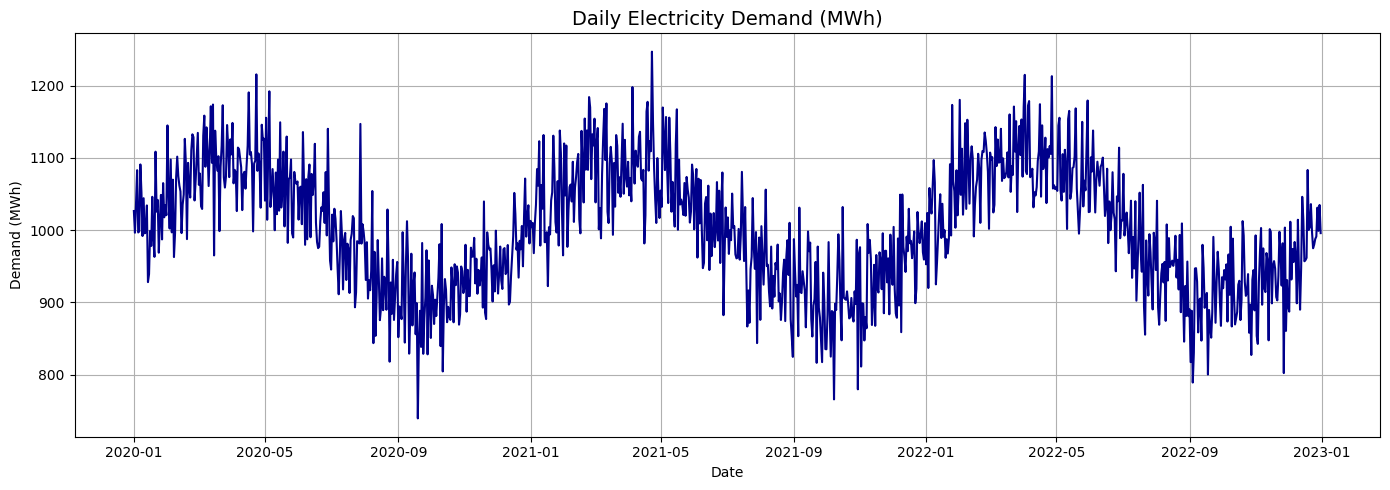

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/electricity_demand_sample.csv")

# Parse dates and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot line chart of demand
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Electricity_Demand_MWh'], color='darkblue')
plt.title("Daily Electricity Demand (MWh)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Demand (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2-4216400333.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


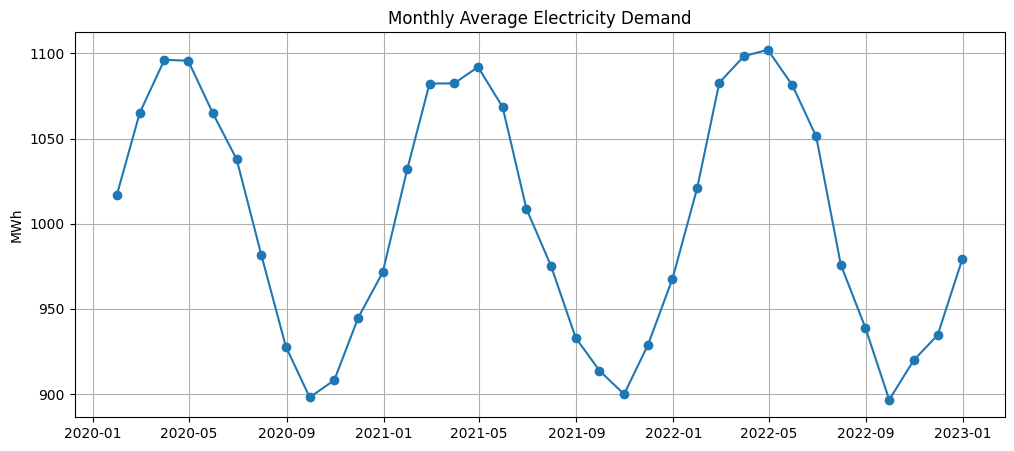

In [2]:
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly['Electricity_Demand_MWh'], marker='o')
plt.title("Monthly Average Electricity Demand")
plt.ylabel("MWh")
plt.grid(True)
plt.show()


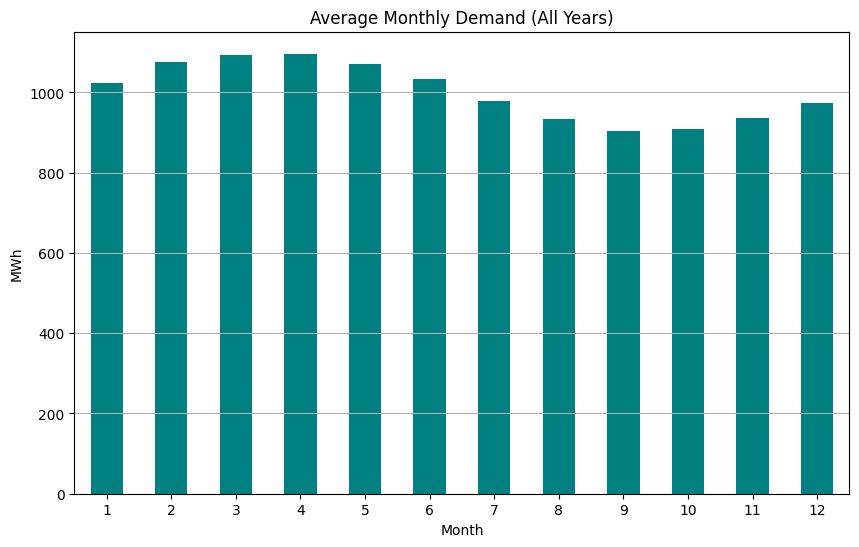

In [3]:
df['Month'] = df.index.month
df['Year'] = df.index.year

plt.figure(figsize=(10, 6))
df.groupby('Month')['Electricity_Demand_MWh'].mean().plot(kind='bar', color='teal')
plt.title("Average Monthly Demand (All Years)")
plt.xlabel("Month")
plt.ylabel("MWh")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [4]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00


In [6]:
%pip install numpy==1.23.5 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 94.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your data
df = pd.read_csv("electricity_demand_sample.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit a SARIMA model manually: SARIMA(p,d,q)(P,D,Q,s)
# These values are chosen as a basic seasonal model. You can tune them.
model = SARIMAX(df['Electricity_Demand_MWh'],
                order=(1, 1, 1),        # ARIMA part
                seasonal_order=(1, 1, 1, 12),  # Seasonal part
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


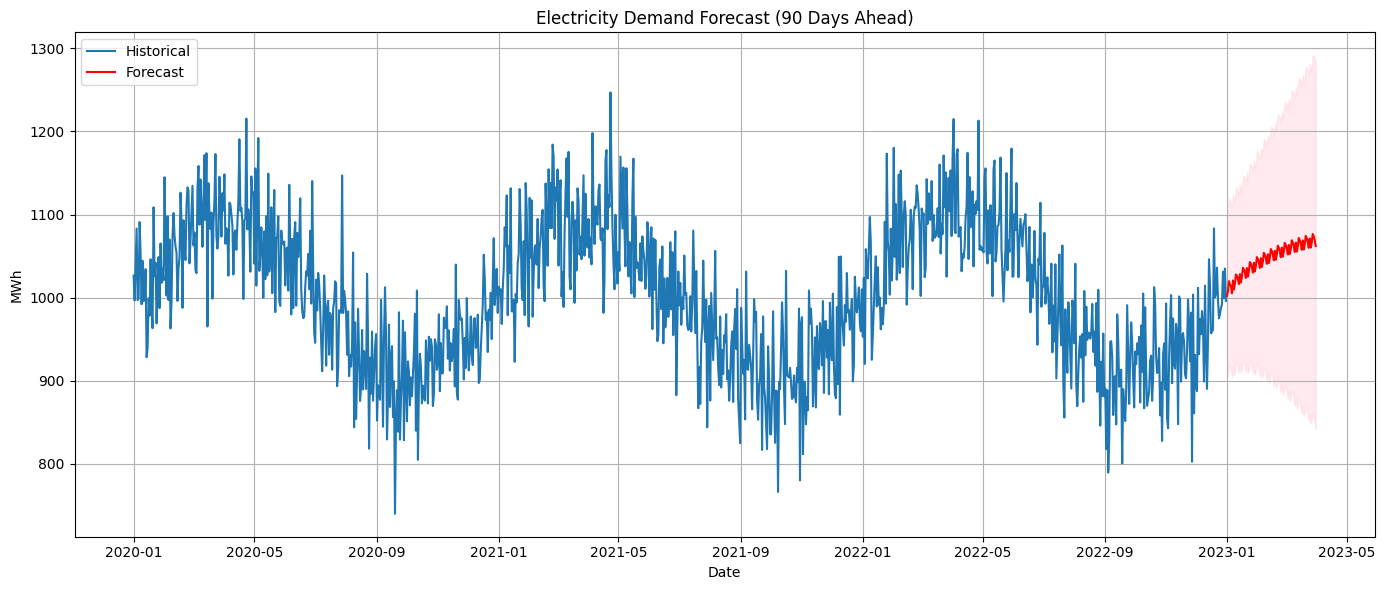

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# New model with weekly seasonality (7-day cycle)
model = SARIMAX(df['Electricity_Demand_MWh'],
                order=(2, 1, 2),              # Try slightly more complex ARIMA terms
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Forecast next 90 days
forecast = results.get_forecast(steps=90)
forecast_df = forecast.summary_frame()
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Electricity_Demand_MWh'], label='Historical')
plt.plot(forecast_index, forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3)
plt.title("Electricity Demand Forecast (90 Days Ahead)")
plt.xlabel("Date")
plt.ylabel("MWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
